# Dynamics Figures

These are a collection of figures for my PhD thesis.
The naming of the figures will remain consistent throughout and the ordering of the figures should be roughly the same as in the thesis.

In [49]:
# Make dealing with filesystem paths much, much simpler
from pathlib import Path

# Read/write data files and data analysis
import pandas
import seaborn

import altair.vegalite.v2 as alt

import sys
sys.path.append("../src")
import figures

# Ability to plot everything
%matplotlib inline
import matplotlib.pyplot as plt

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


This notebook generates a collection of figures which are exported as pdf files to the `../figures/thesis` directory.
To prevent the figures from being saved, only outputting the resulting files to this notebook
you can set the `save_figures` variable to `False`.

In [2]:
save_figures = True
# save_figures = False

## Datasets

The datasets used for the generation of these figures are found in the `../data/analysis` directory,
with the `dynamics.h5` file containing all the dynamics results in 3 tables

- `dynamics` -> containing the standard raw dynamics quantities including the mean-squared-displacement, structural relaxation, and many others. 
    These values include each of these quantities for a number of starting configurations, allowing for the calculation of errors for these quantities.
    For a full list of the available quantities see the [dynamics_interactive notebook](01_dynamics_interactive.ipynb).
- `molecular_relaxations` -> containing the molecular relaxation values for each of the molecules 
    allowing comparisons between quantities for a single molecule.
- `relaxations` -> containing the aggregated relaxation value for each of the quantities in the `dynamics` and `molecular_relaxations` tables. 
    All these values can be investigated in the [relaxations_interactive notebook](02_relaxations_interactive.ipynb)


In [3]:
# Where the data files with the results are located
data_dir = Path('../data/analysis')

# Load data for most of the figures
dynamics_df = pandas.read_hdf(data_dir / 'dynamics_clean.h5', 'dynamics')
# relaxations_df = pandas.read_hdf(data_dir / 'dynamics.h5', 'relaxations')

dynamics_df = dynamics_df.query("pressure == 13.50")

# Output path for all figures
figure_dir = Path("../figures/thesis")
# Ensure the directory exists
figure_dir.mkdir(exist_ok=True)

## Normalisation by Melting Point

The dynamics of many quantities are plotted as a fraction of the melting point,
this creates a column in the data frames with this normalised temperature.

In [4]:
dynamics_df['temp_norm'] = 0

select_high_pressure = (dynamics_df.pressure == 13.50).values
dynamics_df.loc[select_high_pressure, 'temp_norm'] = dynamics_df.loc[select_high_pressure, 'pressure'] / 1.35

select_low_pressure = (dynamics_df.pressure == 1.00).values
dynamics_df.loc[select_low_pressure, 'temp_norm'] = dynamics_df.loc[select_low_pressure, 'pressure'] / 0.36

## Comparative Dynamics

These are a collection of dynamics quantities to establish that the system we are dealing with has behaviour that more or less aligns with much of the literature.

### Mean Squared Displacement

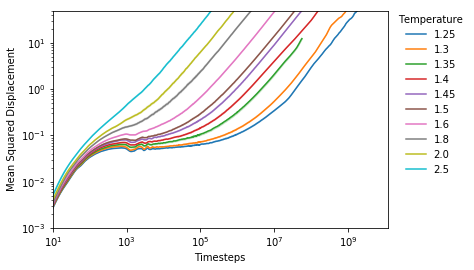

In [5]:
fig, ax = plt.subplots()
# Plot the msd vs time, colouring yb the temperature
seaborn.lineplot(
    'time', 
    'msd', 
    hue='temperature', 
    hue_order=sorted(dynamics_df.temperature.unique()), 
    palette=seaborn.color_palette(), 
    ci=95, 
    data=dynamics_df, 
    ax=ax
)
# We want a log/log scale, so set this here
ax.set_xscale('log')
ax.set_yscale('log')

# The ballistic region of the MSD is not particularly interesting, so remove most of it from the figure
ax.set_xlim(left=10)
ax.set_ylim(top=50, bottom=1e-3)
# ax.set_ylim(bottom=0.01)

# Setup the legend, Seaborn adds it's own label as the first handle
# so we need this method of removing the first handle and label.
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    loc='upper left', 
    frameon=False,
    bbox_to_anchor=(1.02, 1.0), 
    borderaxespad=0.,
    title='Temperature', 
    handles=handles[1:], 
    labels=labels[1:]
)

# Appropriate labels for each axis
ax.set_xlabel('Timesteps')
ax.set_ylabel("Mean Squared Displacement")

# Save figure to a file
if save_figures:
    fig.savefig(figure_dir / "mean-squared-displacement.pdf", bbox_inches='tight')

## Non-gaussian 



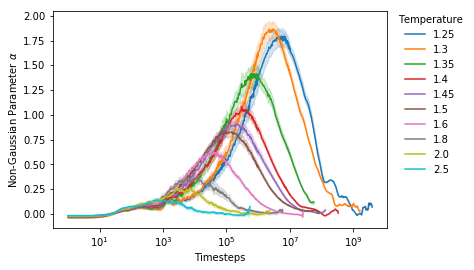

In [6]:
fig, ax = plt.subplots()

seaborn.lineplot(
    'time',
    'alpha',
    hue='temperature',
    palette=seaborn.color_palette(),
    ci=95,
    data=dynamics_df,
    ax=ax,
)

# We want a log scale for the x (time) axis so set this here
ax.set_xscale('log')

# Setup the legend, Seaborn adds it's own label as the first handle
# so we need this method of removing the first handle and label.
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    loc='upper left', 
    bbox_to_anchor=(1.02, 1.0), 
    borderaxespad=0.,
    frameon=False,
    title='Temperature', 
    handles=handles[1:], 
    labels=labels[1:]
)

# Appropriate labels for each axis
ax.set_xlabel('Timesteps')
ax.set_ylabel(r"Non-Gaussian Parameter $\alpha$")

# Save figure to a file
if save_figures:
    fig.savefig(figure_dir / "non-gaussian.pdf", bbox_inches='tight')

## Structural Relaxation

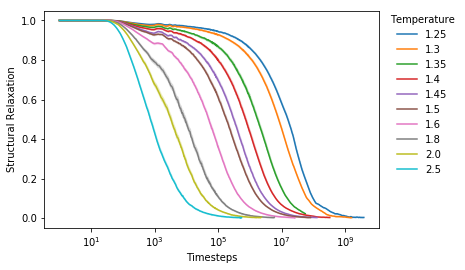

In [7]:
fig, ax = plt.subplots()

seaborn.lineplot(
    'time',
    'struct',
    hue='temperature',
    palette=seaborn.color_palette(),
    ci=95,
    data=dynamics_df,
    ax=ax,
)

# We want a log scale for the x (time) axis so set this here
ax.set_xscale('log')

# Setup the legend, Seaborn adds it's own label as the first handle
# so we need this method of removing the first handle and label.
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    loc='upper left', 
    frameon=False,
    bbox_to_anchor=(1.02, 1.0), 
    borderaxespad=0.,
    title='Temperature', 
    handles=handles[1:], 
    labels=labels[1:]
)

# Appropriate labels for each axis
ax.set_xlabel('Timesteps')
ax.set_ylabel("Structural Relaxation")

# Save figure to a file
if save_figures:
    fig.savefig(figure_dir / "structural_relaxation.pdf", bbox_inches='tight')

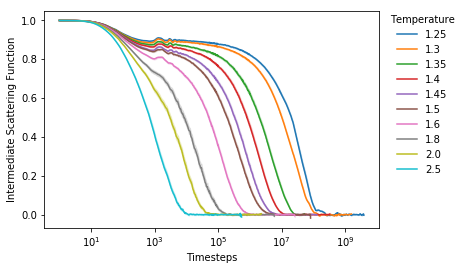

In [8]:
fig, ax = plt.subplots()

seaborn.lineplot(
    'time',
    'scattering_function',
    hue='temperature',
    palette=seaborn.color_palette(),
    ci=95,
    data=dynamics_df,
    ax=ax,
)

# We want a log scale for the x (time) axis so set this here
ax.set_xscale('log')

# Setup the legend, Seaborn adds it's own label as the first handle
# so we need this method of removing the first handle and label.
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    loc='upper left', 
    frameon=False,
    bbox_to_anchor=(1.02, 1.0), 
    borderaxespad=0.,
    title='Temperature', 
    handles=handles[1:], 
    labels=labels[1:]
)

# Appropriate labels for each axis
ax.set_xlabel('Timesteps')
ax.set_ylabel("Intermediate Scattering Function")

# Save figure to a file
if save_figures:
    fig.savefig(figure_dir / "scattering_function.pdf", bbox_inches='tight')

## Rotational Relaxation

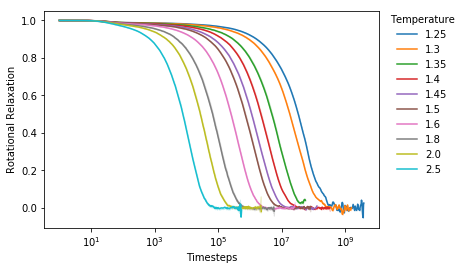

In [9]:
fig, ax = plt.subplots()

seaborn.lineplot(
    'time',
    'rot2',
    hue='temperature',
    palette=seaborn.color_palette(),
    ci=95,
    data=dynamics_df,
    ax=ax,
)

# We want a log scale for the x (time) axis so set this here
ax.set_xscale('log')

# Setup the legend, Seaborn adds it's own label as the first handle
# so we need this method of removing the first handle and label.
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    loc='upper left', 
    frameon=False,
    bbox_to_anchor=(1.02, 1.0), 
    borderaxespad=0.,
    title='Temperature', 
    handles=handles[1:], 
    labels=labels[1:]
)

# Appropriate labels for each axis
ax.set_xlabel('Timesteps')
ax.set_ylabel("Rotational Relaxation")

# Save figure to a file
if save_figures:
    fig.savefig(figure_dir / "rotational_relaxation.pdf", bbox_inches='tight')

In [10]:
dynamics_df.columns

Index(['alpha', 'com_struct', 'gamma', 'mean_displacement', 'mean_rotation',
       'mfd', 'msd', 'overlap', 'pressure', 'rot1', 'rot2',
       'scattering_function', 'start_index', 'struct', 'temperature', 'time',
       'temp_norm'],
      dtype='object')

## Relaxation Quantities

In [11]:
relaxations_df = pandas.read_hdf(data_dir / "dynamics_clean.h5", "relaxations")
# relaxations_df = relaxations_df.query("pressure == 13.50")
mask = relaxations_df.pressure == 13.50
t_melting_high = 1.35
t_melting_low = 0.35
relaxations_df['inv_temp'] = 0.
relaxations_df.loc[mask, 'inv_temp'] = t_melting_high / relaxations_df.temperature
relaxations_df.loc[~mask, 'inv_temp'] = t_melting_low / relaxations_df.temperature
relaxations_df['inv_diffusion'] = 1 / relaxations_df.diffusion_constant

In [12]:
relaxations_df.columns

Index(['temperature', 'pressure', 'tau_D', 'tau_Fmol', 'tau_L', 'tau_T2',
       'tau_T3', 'tau_T4', 'max_alpha_time', 'tau_F', 'max_gamma_time',
       'diffusion_constant', 'tau_R1', 'tau_R2', 'scattering_function',
       'tau_S', 'inv_temp', 'inv_diffusion'],
      dtype='object')

In [50]:
relaxation_chart = alt.Chart(comp_relax_df).mark_point().encode(
    alt.X('inv_temp', title="Tm/T"),
    alt.Y('value', title="Relaxtion Time", scale=alt.Scale(type='log'), axis=alt.Axis(format='e')),
    alt.Color('pressure:N', title="Pressure"),
    alt.Shape('variable', title="Quantity"),
)

### Scattering Function

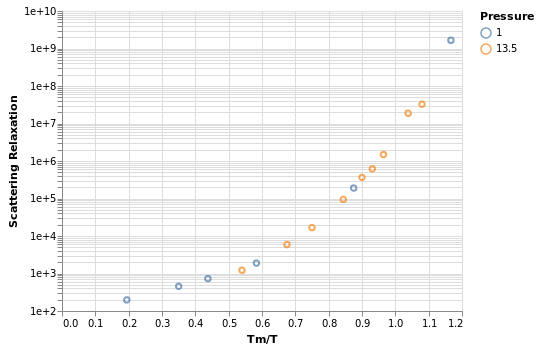

In [55]:
relaxation_chart = alt.Chart(comp_relax_df).mark_point().encode(
    alt.X('inv_temp', title="Tm/T"),
    alt.Y('value', title="Scattering Relaxation", scale=alt.Scale(type='log'), axis=alt.Axis(format='e')),
    alt.Color('pressure:N', title="Pressure"),
).transform_filter(
    (alt.datum.variable == "scattering_function")
)

relaxation_chart

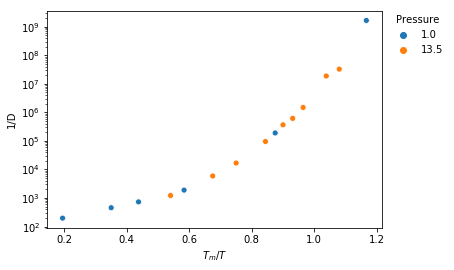

In [13]:
fig, ax = plt.subplots()

seaborn.scatterplot(
    'inv_temp',
    'scattering_function',
    hue='pressure',
    palette=seaborn.color_palette(n_colors=2),
    ci=95,
    data=relaxations_df,
    ax=ax,
)

# We want a log scale for the x (time) axis so set this here
ax.set_yscale('log')

# Appropriate labels for each axis
ax.set_xlabel(r'$T_m/T$')
ax.set_ylabel("1/D")

# Setup the legend, Seaborn adds it's own label as the first handle
# so we need this method of removing the first handle and label.
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    loc='upper left', 
    frameon=False,
    bbox_to_anchor=(1.02, 1.0), 
    borderaxespad=0.,
    title='Pressure', 
    handles=handles[1:], 
    labels=labels[1:]
)

# Save figure to a file
if save_figures:
    fig.savefig(figure_dir / "isf_relaxtion.pdf", bbox_inches='tight')

### Diffusion

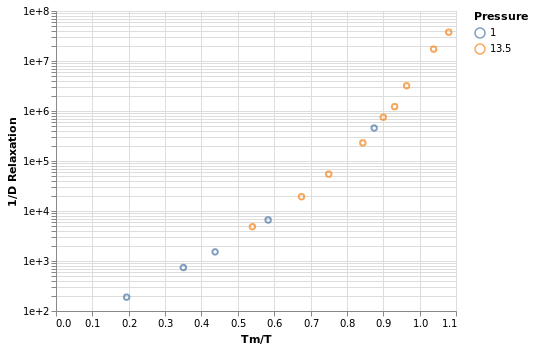

In [57]:
relaxation_chart = alt.Chart(comp_relax_df).mark_point().encode(
    alt.X('inv_temp', title="Tm/T"),
    alt.Y('value', title="1/D Relaxation", scale=alt.Scale(type='log'), axis=alt.Axis(format='e')),
    alt.Color('pressure:N', title="Pressure"),
).transform_filter(
    (alt.datum.variable == "inv_diffusion")
)

relaxation_chart

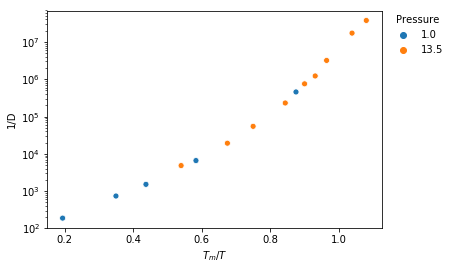

In [14]:
fig, ax = plt.subplots()

seaborn.scatterplot(
    'inv_temp',
    'inv_diffusion',
    hue='pressure',
    palette=seaborn.color_palette(n_colors=2),
    ci=95,
    data=relaxations_df,
    ax=ax,
)

# We want a log scale for the x (time) axis so set this here
ax.set_yscale('log')

# Appropriate labels for each axis
ax.set_xlabel(r'$T_m/T$')
ax.set_ylabel("1/D")

# Setup the legend, Seaborn adds it's own label as the first handle
# so we need this method of removing the first handle and label.
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    loc='upper left', 
    frameon=False,
    bbox_to_anchor=(1.02, 1.0), 
    borderaxespad=0.,
    title='Pressure', 
    handles=handles[1:], 
    labels=labels[1:]
)

# Save figure to a file
if save_figures:
    fig.savefig(figure_dir / "diffusion_constant.pdf", bbox_inches='tight')

### Rotational Relaxation

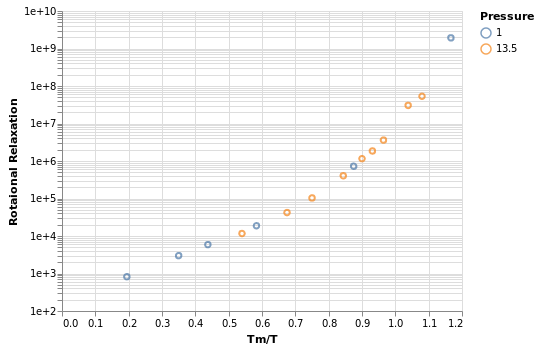

In [58]:
relaxation_chart = alt.Chart(comp_relax_df).mark_point().encode(
    alt.X('inv_temp', title="Tm/T"),
    alt.Y('value', title="Rotaional Relaxation", scale=alt.Scale(type='log'), axis=alt.Axis(format='e')),
    alt.Color('pressure:N', title="Pressure"),
).transform_filter(
    (alt.datum.variable == "tau_R2")
)

relaxation_chart

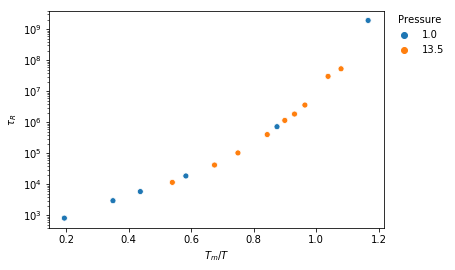

In [15]:
fig, ax = plt.subplots()

seaborn.scatterplot(
    'inv_temp',
    'tau_R2',
    hue='pressure',
    palette=seaborn.color_palette(n_colors=2),
    ci=95,
    data=relaxations_df,
    ax=ax,
)

# We want a log scale for the x (time) axis so set this here
ax.set_yscale('log')

# Appropriate labels for each axis
ax.set_xlabel(r'$T_m/T$')
ax.set_ylabel(r"$\tau_R$")

# Setup the legend, Seaborn adds it's own label as the first handle
# so we need this method of removing the first handle and label.
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    loc='upper left', 
    frameon=False,
    bbox_to_anchor=(1.02, 1.0), 
    borderaxespad=0.,
    title='Pressure', 
    handles=handles[1:], 
    labels=labels[1:]
)

# Save figure to a file
if save_figures:
    fig.savefig(figure_dir / "rotational_relaxation_times.pdf", bbox_inches='tight')

### Molecular Structural Relaxation

In [16]:
comp_relax_df = relaxations_df.melt(id_vars=["inv_temp", "pressure", "temperature"])
comp_relax_df.variable.unique()

array(['tau_D', 'tau_Fmol', 'tau_L', 'tau_T2', 'tau_T3', 'tau_T4',
       'max_alpha_time', 'tau_F', 'max_gamma_time', 'diffusion_constant',
       'tau_R1', 'tau_R2', 'scattering_function', 'tau_S',
       'inv_diffusion'], dtype=object)

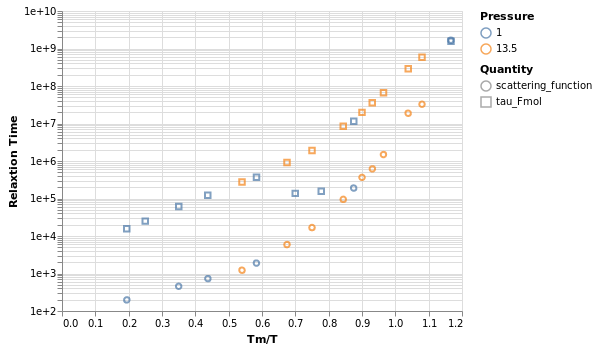

In [59]:
c.transform_filter((alt.datum.variable == "scattering_function") | (alt.datum.variable == "tau_Fmol"))

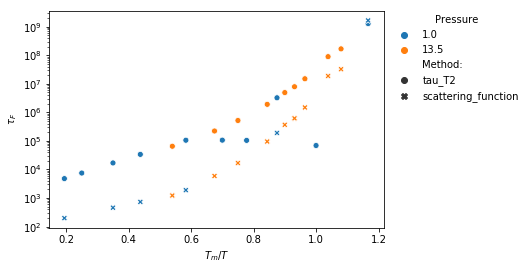

In [17]:
fig, ax = plt.subplots()

seaborn.scatterplot(
    'inv_temp',
    'value',
    hue='pressure',
    style="variable",
    palette=seaborn.color_palette(n_colors=2),
    ci=95,
    data=comp_relax_df[comp_relax_df['variable'].isin(["scattering_function", "tau_T2"])],
    ax=ax,
)

# We want a log scale for the x (time) axis so set this here
ax.set_yscale('log')

# Appropriate labels for each axis
ax.set_xlabel(r'$T_m/T$')
ax.set_ylabel(r"$\tau_F$")

# Setup the legend, Seaborn adds it's own label as the first handle
# so we need this method of removing the first handle and label.
handles, labels = ax.get_legend_handles_labels()
labels[3] = "Method:"
# labels[4] = "Collective"
# labels[5] = "Individual"
ax.legend(
    loc='upper left', 
    frameon=False,
    bbox_to_anchor=(1.02, 1.0), 
    borderaxespad=0.,
    title='Pressure', 
    handles=handles[1:], 
    labels=labels[1:]
)


# Save figure to a file
if save_figures:
    fig.savefig(figure_dir / "mol_structural_relaxation.pdf", bbox_inches='tight')

### Molecular Rotational Relaxation

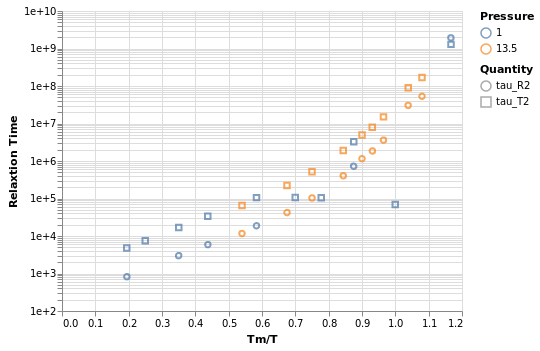

In [45]:
import altair.vegalite.v2 as alt

c = alt.Chart(comp_relax_df).mark_point().encode(
    alt.X('inv_temp', title="Tm/T"),
    alt.Y('value', title="Relaxtion Time", scale=alt.Scale(type='log'), axis=alt.Axis(format='e')),
    alt.Color('pressure:N', title="Pressure"),
    alt.Shape('variable', title="Quantity"),
)

c.transform_filter((alt.datum.variable == "tau_R2") | (alt.datum.variable == "tau_T2"))

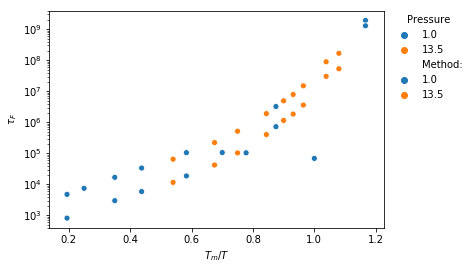

In [19]:
fig, ax = plt.subplots()

# Reference Configuration
seaborn.scatterplot(
    'inv_temp',
    'value',
    hue='pressure',
    markers=['x'],
    palette=seaborn.color_palette(n_colors=2),
    ci=95,
    data=comp_relax_df[comp_relax_df['variable'].isin(["tau_R2"])],
    ax=ax,
)

seaborn.scatterplot(
    'inv_temp',
    'value',
    hue='pressure',
    palette=seaborn.color_palette(n_colors=2),
    ci=95,
    data=comp_relax_df[comp_relax_df['variable'].isin(["tau_T2"])],
    ax=ax,
)


# We want a log scale for the x (time) axis so set this here
ax.set_yscale('log')

# Appropriate labels for each axis
ax.set_xlabel(r'$T_m/T$')
ax.set_ylabel(r"$\tau_F$")

# Setup the legend, Seaborn adds it's own label as the first handle
# so we need this method of removing the first handle and label.
handles, labels = ax.get_legend_handles_labels()
labels[3] = "Method:"
# labels[4] = "Collective"
# labels[5] = "Individual"
ax.legend(
    loc='upper left', 
    frameon=False,
    bbox_to_anchor=(1.02, 1.0), 
    borderaxespad=0.,
    title='Pressure', 
    handles=handles[1:], 
    labels=labels[1:]
)


# Save figure to a file
if save_figures:
    fig.savefig(figure_dir / "mol_rotational_relaxation.pdf", bbox_inches='tight')

### Molecular Diffusion

The diffusion constant is a rate,
so to fairly compare the diffusion relaxation time
with the diffusion constant we need to normalise by the distance travelled.

In [20]:
# import numpy as np
# distance_p1 = 3 * np.pi/(2*2.80)
# distance_p13 = 3 * np.pi/(2*2.90)
# rate_tau_D1 = relaxations_df.query('pressure == 1.0').tau_D / (distance_p1 ** 2)
# rate_tau_D13= relaxations_df.query('pressure == 13.50').tau_D / (distance_p13 ** 2)
# relaxations_df['rate_tau_D'] = pandas.concat([rate_tau_D1, rate_tau_D13])

In [21]:
# comp_relax_df = relaxations_df.melt(id_vars=["inv_temp", "pressure", "temperature"])

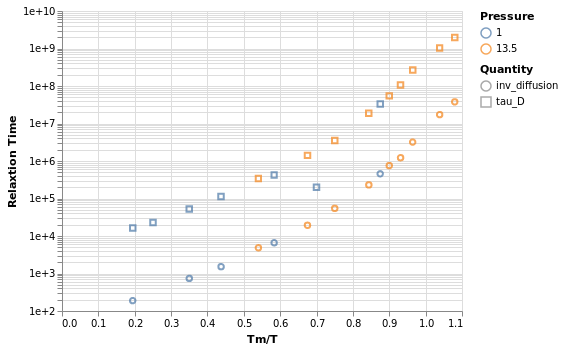

In [46]:
import altair.vegalite.v2 as alt

c = alt.Chart(comp_relax_df).mark_point().encode(
    alt.X('inv_temp', title="Tm/T"),
    alt.Y('value', title="Relaxtion Time", scale=alt.Scale(type='log'), axis=alt.Axis(format='e')),
    alt.Color('pressure:N', title="Pressure"),
    alt.Shape('variable', title="Quantity"),
)

c.transform_filter((alt.datum.variable == "inv_diffusion") | (alt.datum.variable == "tau_D"))

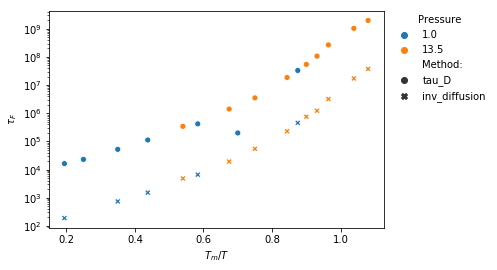

In [22]:
fig, ax = plt.subplots()

seaborn.scatterplot(
    'inv_temp',
    'value',
    hue='pressure',
    style="variable",
    palette=seaborn.color_palette(n_colors=2),
    ci=95,
    data=comp_relax_df[comp_relax_df['variable'].isin(["inv_diffusion", "tau_D"])],
    ax=ax,
)

# We want a log scale for the x (time) axis so set this here
ax.set_yscale('log')

# Appropriate labels for each axis
ax.set_xlabel(r'$T_m/T$')
ax.set_ylabel(r"$\tau_F$")

# Setup the legend, Seaborn adds it's own label as the first handle
# so we need this method of removing the first handle and label.
handles, labels = ax.get_legend_handles_labels()
labels[3] = "Method:"
# labels[4] = "Collective"
# labels[5] = "Individual"
ax.legend(
    loc='upper left', 
    frameon=False,
    bbox_to_anchor=(1.02, 1.0), 
    borderaxespad=0.,
    title='Pressure', 
    handles=handles[1:], 
    labels=labels[1:]
)


# Save figure to a file
if save_figures:
    fig.savefig(figure_dir / "mol_rotational_relaxation.pdf", bbox_inches='tight')

### Rotational Relxation

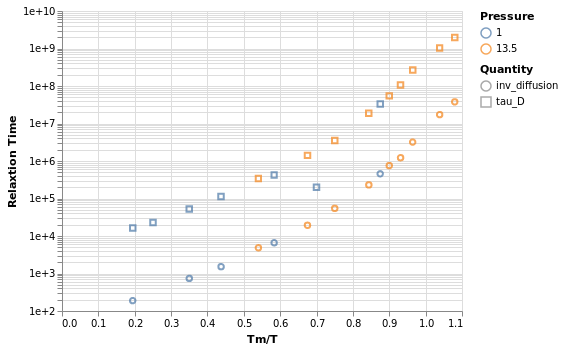

In [46]:
import altair.vegalite.v2 as alt

c = alt.Chart(comp_relax_df).mark_point().encode(
    alt.X('inv_temp', title="Tm/T"),
    alt.Y('value', title="Relaxtion Time", scale=alt.Scale(type='log'), axis=alt.Axis(format='e')),
    alt.Color('pressure:N', title="Pressure"),
    alt.Shape('variable', title="Quantity"),
)

c.transform_filter((alt.datum.variable == "inv_diffusion") | (alt.datum.variable == "tau_D"))

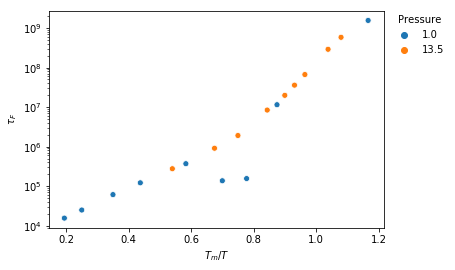

In [23]:
fig, ax = plt.subplots()

seaborn.scatterplot(
    'inv_temp',
    'tau_Fmol',
    hue='pressure',
    palette=seaborn.color_palette(n_colors=2),
    ci=95,
    data=relaxations_df,
    ax=ax,
    legend="full",
)

# We want a log scale for the x (time) axis so set this here
ax.set_yscale('log')

# Appropriate labels for each axis
ax.set_xlabel(r'$T_m/T$')
ax.set_ylabel(r"$\tau_F$")

# Setup the legend, Seaborn adds it's own label as the first handle
# so we need this method of removing the first handle and label.
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    loc='upper left', 
    frameon=False,
    bbox_to_anchor=(1.02, 1.0), 
    borderaxespad=0.,
    title='Pressure', 
    handles=handles[1:], 
    labels=labels[1:]
)


# Save figure to a file
if save_figures:
    fig.savefig(figure_dir / "mol_structural_relaxation.pdf", bbox_inches='tight')

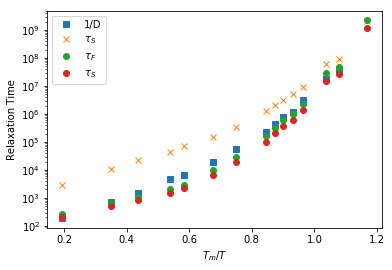

In [24]:
fig, ax = plt.subplots()

ax.plot('inv_temp', 'inv_diffusion', 's', data=relaxations_df, label="1/D")
ax.plot('inv_temp', 'tau_R1', 'x', data=relaxations_df, label=r"$\tau_S$")
ax.plot('inv_temp', 'tau_F', 'o', data=relaxations_df, label=r"$\tau_F$")
ax.plot('inv_temp', 'tau_S', 'o', data=relaxations_df, label=r"$\tau_S$")

ax.set_xlabel('$T_m/T$')
ax.set_ylabel("Relaxation Time")

# ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

fig.savefig("Relaxations.pdf")

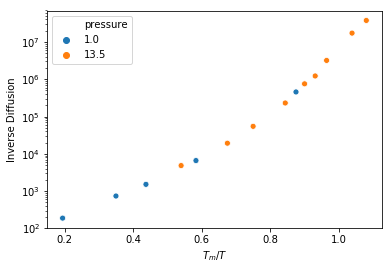

In [25]:
fig, ax = plt.subplots()
relaxations_df.pressure = relaxations_df.pressure.astype('float')
seaborn.scatterplot('inv_temp', 'inv_diffusion', 
                    hue='pressure', 
                    hue_order=sorted(relaxations_df.pressure.unique()), 
                    palette=seaborn.color_palette(n_colors=2), 
                    data=relaxations_df)
ax.set_xlabel('$T_m/T$')
ax.set_ylabel("Inverse Diffusion")
ax.set_yscale('log')

fig.savefig("Diffusion.pdf")

In [26]:
dynamics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2307324 entries, 1 to 7661
Data columns (total 17 columns):
alpha                  float64
com_struct             float64
gamma                  float64
mean_displacement      float64
mean_rotation          float64
mfd                    float64
msd                    float64
overlap                float64
pressure               float64
rot1                   float64
rot2                   float64
scattering_function    float64
start_index            int64
struct                 float64
temperature            float64
time                   int64
temp_norm              float64
dtypes: float64(15), int64(2)
memory usage: 316.9 MB


In [27]:
relaxations_df

,temperature,pressure,tau_D,tau_Fmol,tau_L,tau_T2,tau_T3,tau_T4,max_alpha_time,tau_F,max_gamma_time,diffusion_constant,tau_R1,tau_R2,scattering_function,tau_S,inv_temp,inv_diffusion
0,0.30,1.0,NaN,1.550235e+09,NaN,1.289079e+09,1.108850e+09,1.009618e+09,76000000.0,2.209701e+09,88000000.0,NaN,2.087848e+09,1.919798e+09,1.656424e+09,1.215223e+09,1.166667,NaN
1,0.35,1.0,NaN,NaN,NaN,6.900000e+04,1.187778e+05,1.058421e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
2,0.40,1.0,3.308197e+07,1.147603e+07,NaN,3.242713e+06,1.623369e+06,1.041050e+06,85000.0,3.132577e+05,26000.0,2.192782e-06,2.074888e+06,7.248029e+05,1.899534e+05,2.035457e+05,0.875000,4.560416e+05
3,0.45,1.0,NaN,1.556923e+05,NaN,1.044000e+05,8.714947e+04,7.656211e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.777778,NaN
4,0.50,1.0,2.000000e+05,1.370000e+05,NaN,1.063028e+05,8.215320e+04,5.790194e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700000,NaN
5,0.60,1.0,4.207391e+05,3.701827e+05,NaN,1.055984e+05,4.644343e+04,2.616167e+04,1500.0,2.981373e+03,710.0,1.513907e-04,6.964710e+04,1.873082e+04,1.891239e+03,2.276686e+03,0.583333,6.605427e+03
6,0.80,1.0,1.125500e+05,1.215588e+05,NaN,3.373927e+04,1.519614e+04,8.614323e+03,520.0,1.053642e+03,450.0,6.575456e-04,2.235152e+04,5.884149e+03,7.307722e+02,8.176066e+02,0.437500,1.520807e+03
7,1.00,1.0,5.236177e+04,6.117853e+04,NaN,1.692157e+04,7.718042e+03,4.462649e+03,450.0,6.309112e+02,280.0,1.350951e-03,1.117330e+04,2.992672e+03,4.564634e+02,4.977959e+02,0.350000,7.402191e+02
8,1.25,13.5,1.978372e+09,5.809485e+08,NaN,1.675058e+08,1.024417e+08,7.590464e+07,6000000.0,4.678647e+07,840000.0,2.654763e-08,9.238010e+07,5.317914e+07,3.262515e+07,2.763393e+07,1.080000,3.766814e+07
9,1.30,13.5,1.034164e+09,2.890252e+08,NaN,8.937603e+07,5.640120e+07,4.209598e+07,2900000.0,2.913743e+07,940000.0,5.803198e-08,6.080399e+07,3.030014e+07,1.877072e+07,1.534151e+07,1.038462,1.723188e+07
